## 4.- Compute global statistics

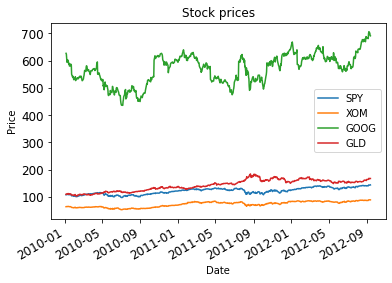


 mean
 SPY     121.711206
XOM      73.296221
GOOG    568.941941
GLD     142.603279
dtype: float64

 median
 SPY     123.305
XOM      76.440
GOOG    578.845
GLD     146.440
dtype: float64

 standard deviation
 SPY     11.626556
XOM     10.168104
GOOG    54.068129
GLD     20.562938
dtype: float64


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp=pd.read_csv(f"{symbol}.csv", index_col='Date',
                        parse_dates=True, usecols=['Date', 'Adj Close'],
                        na_values=['nan'])
                        
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp)
        df = df.dropna()
    return df

def plot_data(df, title = "Stock prices"):
  ax = df.plot(title=title, fontsize=12)
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")
  plt.show()

def test_run():
  # Read data
  dates = pd.date_range('2010-01-01', '2012-12-31')
  symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
  df = get_data(symbols, dates)
  plot_data(df)

  # Compute global statistics fol each stock
  print("\n mean\n",df.mean())
  print("\n median\n",df.median())
  print("\n standard deviation\n",df.std())


if __name__ == "__main__":
  test_run()